In [3]:
import pandas as pd
import numpy as np
deaths=pd.read_excel('data/deaths.xlsx')
code=pd.read_excel('data/icd-main.xlsx')
print(deaths.columns,'\n',code.columns)

Index(['Unnamed: 0', 'yod', 'mod', 'dod', 'hod', 'cod'], dtype='object') 
 Index(['code', 'disease'], dtype='object')


In [4]:
mexico_deaths_2008=deaths[(deaths['yod']==2008)&(deaths['mod']!=0)&(deaths['dod']!=0)].dropna()
print(mexico_deaths_2008.shape)

(502520, 6)


In [5]:
mexico_deaths=deaths.dropna()
mexico_deaths.head(10)

,Unnamed: 0,yod,mod,dod,hod,cod
33,34,1920,11,17,3.0,W78
35,36,1923,2,4,16.0,J44
36,37,1923,6,23,19.0,E12
37,38,1926,2,5,16.0,C67
38,39,1926,4,1,16.0,J44
39,40,1928,10,30,19.0,I27
40,41,1929,4,23,15.0,I25
41,42,1930,9,11,19.0,E14
42,43,1930,12,22,19.0,E11
43,44,1931,5,26,11.0,K65


In [6]:
m_d=mexico_deaths.groupby(['hod','cod']).size().reset_index().rename(columns={0:'freq','cod':'code'}).dropna()
m_d=pd.merge(left=m_d,right=code,on='code')
m_d[:10]

,hod,code,freq,disease
0,1.0,A01,3,Typhoid and paratyphoid fevers
1,2.0,A01,1,Typhoid and paratyphoid fevers
2,3.0,A01,4,Typhoid and paratyphoid fevers
3,5.0,A01,5,Typhoid and paratyphoid fevers
4,6.0,A01,1,Typhoid and paratyphoid fevers
5,8.0,A01,1,Typhoid and paratyphoid fevers
6,10.0,A01,2,Typhoid and paratyphoid fevers
7,11.0,A01,2,Typhoid and paratyphoid fevers
8,12.0,A01,1,Typhoid and paratyphoid fevers
9,13.0,A01,6,Typhoid and paratyphoid fevers


In [7]:
m_d=mexico_deaths.groupby(['hod','cod']).size()
m_d[:100]

hod  cod
1.0  A01     3
     A02     3
     A04     7
     A05     1
     A06     2
            ..
     C69     3
     C71    55
     C72     4
     C73    20
     C74     1
Length: 100, dtype: int64

In [8]:
m_d=mexico_deaths.groupby(['hod','cod']).size().reset_index()
m_d[:10]

,hod,cod,0
0,1.0,A01,3
1,1.0,A02,3
2,1.0,A04,7
3,1.0,A05,1
4,1.0,A06,2
5,1.0,A09,112
6,1.0,A15,2
7,1.0,A16,53
8,1.0,A17,2
9,1.0,A18,5


In [9]:
m_d=mexico_deaths.groupby(['hod','cod']).size().reset_index().rename(columns={0:'freq','cod':'code'}).dropna()
m_d[:10]

,hod,code,freq
0,1.0,A01,3
1,1.0,A02,3
2,1.0,A04,7
3,1.0,A05,1
4,1.0,A06,2
5,1.0,A09,112
6,1.0,A15,2
7,1.0,A16,53
8,1.0,A17,2
9,1.0,A18,5


In [10]:
m_d=mexico_deaths.groupby(['hod','cod']).size().reset_index().rename(columns={0:'freq','cod':'code'}).dropna()
m_d[:10]

,hod,code,freq
0,1.0,A01,3
1,1.0,A02,3
2,1.0,A04,7
3,1.0,A05,1
4,1.0,A06,2
5,1.0,A09,112
6,1.0,A15,2
7,1.0,A16,53
8,1.0,A17,2
9,1.0,A18,5


In [11]:
code_sum=mexico_deaths['cod'].dropna().value_counts()

In [12]:
hour_sum=mexico_deaths['hod'].dropna().value_counts()

In [13]:
code_sum[:10]

I21    46794
E11    42421
E14    27330
J44    16043
K70    12860
J18    12516
K74    12486
I25    10059
I50     8486
X59     8188
Name: cod, dtype: int64

In [14]:
hour_sum

18.0    24380
10.0    24321
16.0    23890
11.0    23843
6.0     23787
17.0    23625
12.0    23392
13.0    23284
15.0    23278
14.0    23053
20.0    22926
19.0    22919
9.0     22401
5.0     22126
8.0     21915
7.0     21822
23.0    21446
21.0    20995
22.0    20510
1.0     20430
4.0     20239
3.0     19729
2.0     18962
Name: hod, dtype: int64

In [15]:
m_d=mexico_deaths.groupby(['hod','cod']).size().reset_index().rename(columns={0:'freq','cod':'code'}).dropna()
m_d=pd.merge(left=m_d,right=code,on='code')
m_d[:10]

,hod,code,freq,disease
0,1.0,A01,3,Typhoid and paratyphoid fevers
1,2.0,A01,1,Typhoid and paratyphoid fevers
2,3.0,A01,4,Typhoid and paratyphoid fevers
3,5.0,A01,5,Typhoid and paratyphoid fevers
4,6.0,A01,1,Typhoid and paratyphoid fevers
5,8.0,A01,1,Typhoid and paratyphoid fevers
6,10.0,A01,2,Typhoid and paratyphoid fevers
7,11.0,A01,2,Typhoid and paratyphoid fevers
8,12.0,A01,1,Typhoid and paratyphoid fevers
9,13.0,A01,6,Typhoid and paratyphoid fevers


In [16]:
m_d['n'] = m_d.apply(lambda row:code_sum[row['code']],axis=1)
m_d[:10]

,hod,code,freq,disease,n
0,1.0,A01,3,Typhoid and paratyphoid fevers,52
1,2.0,A01,1,Typhoid and paratyphoid fevers,52
2,3.0,A01,4,Typhoid and paratyphoid fevers,52
3,5.0,A01,5,Typhoid and paratyphoid fevers,52
4,6.0,A01,1,Typhoid and paratyphoid fevers,52
5,8.0,A01,1,Typhoid and paratyphoid fevers,52
6,10.0,A01,2,Typhoid and paratyphoid fevers,52
7,11.0,A01,2,Typhoid and paratyphoid fevers,52
8,12.0,A01,1,Typhoid and paratyphoid fevers,52
9,13.0,A01,6,Typhoid and paratyphoid fevers,52


In [17]:
import pandas as pd
 
df = pd.DataFrame([
  ['JOHN SMITH', 'Male'],
  ['Jane Doe', 'Female'],
  ['joe schmo', 'Female']
],
columns=['last_name', 'gender'])
 
df['salutation']=df.apply(lambda row:'Dear Mr. %s'%row.last_name if row.gender=='Male' else'Dear Ms. %s'%row.last_name,axis=1)
 
print(df)

    last_name  gender           salutation
0  JOHN SMITH    Male  Dear Mr. JOHN SMITH
1    Jane Doe  Female    Dear Ms. Jane Doe
2   joe schmo  Female   Dear Ms. joe schmo


In [18]:
m_d['prop'] = m_d.apply(lambda row: row['freq']/row['n'], axis=1)

In [19]:
m_d[:10]

,hod,code,freq,disease,n,prop
0,1.0,A01,3,Typhoid and paratyphoid fevers,52,0.057692
1,2.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231
2,3.0,A01,4,Typhoid and paratyphoid fevers,52,0.076923
3,5.0,A01,5,Typhoid and paratyphoid fevers,52,0.096154
4,6.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231
5,8.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231
6,10.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462
7,11.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462
8,12.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231
9,13.0,A01,6,Typhoid and paratyphoid fevers,52,0.115385


In [20]:
m_d['freq_all'] = m_d.apply(lambda row: hour_sum[row['hod']], axis=1)
m_d_hour = m_d.drop_duplicates('hod').sort_values('hod') #计算总死亡人数
m_d['prop_all'] = m_d.apply(lambda row: row['freq_all']/m_d_hour['freq_all'].sum(), axis=1)

In [21]:
m_d[:10]

,hod,code,freq,disease,n,prop,freq_all,prop_all
0,1.0,A01,3,Typhoid and paratyphoid fevers,52,0.057692,20430,0.039803
1,2.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,18962,0.036943
2,3.0,A01,4,Typhoid and paratyphoid fevers,52,0.076923,19729,0.038438
3,5.0,A01,5,Typhoid and paratyphoid fevers,52,0.096154,22126,0.043108
4,6.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23787,0.046344
5,8.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,21915,0.042697
6,10.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,24321,0.047384
7,11.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,23843,0.046453
8,12.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23392,0.045574
9,13.0,A01,6,Typhoid and paratyphoid fevers,52,0.115385,23284,0.045364


In [22]:
m_d['dist'] = m_d.apply(lambda row: (row['prop']-row['prop_all'])**2, axis=1)
#【提示】查看结果数据集
m_d[:10]

,hod,code,freq,disease,n,prop,freq_all,prop_all,dist
0,1.0,A01,3,Typhoid and paratyphoid fevers,52,0.057692,20430,0.039803,0.000320
1,2.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,18962,0.036943,0.000314
2,3.0,A01,4,Typhoid and paratyphoid fevers,52,0.076923,19729,0.038438,0.001481
3,5.0,A01,5,Typhoid and paratyphoid fevers,52,0.096154,22126,0.043108,0.002814
4,6.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23787,0.046344,0.000735
5,8.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,21915,0.042697,0.000551
6,10.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,24321,0.047384,0.000080
7,11.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,23843,0.046453,0.000064
8,12.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23392,0.045574,0.000694
9,13.0,A01,6,Typhoid and paratyphoid fevers,52,0.115385,23284,0.045364,0.004903


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, '每小时死亡人数变化折线图')

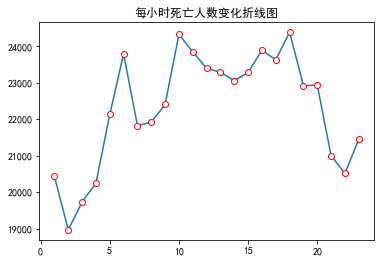

In [26]:
#【思路】每小时死亡人数变化折线图
m_d_hour = m_d.drop_duplicates('hod').sort_values('hod')
plt.plot(m_d_hour['hod'], m_d_hour['freq_all'], marker='o', mec='r', mfc='w')
#【提示】plt.plot()这里的参数分别为：x轴数据、y轴数据、marker表示节点采用圆圈标记、mec设置标记边缘颜色为红色，mfc设置标记填充颜色为白色
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False
plt.title('每小时死亡人数变化折线图')
#【提示】plt.title()设置图标题，默认输出英文，如果输出中文，要对字体进行调整。

In [27]:
m_d_50=m_d[m_d['n']>50]
m_d_50[:10]

,hod,code,freq,disease,n,prop,freq_all,prop_all,dist
0,1.0,A01,3,Typhoid and paratyphoid fevers,52,0.057692,20430,0.039803,0.000320
1,2.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,18962,0.036943,0.000314
2,3.0,A01,4,Typhoid and paratyphoid fevers,52,0.076923,19729,0.038438,0.001481
3,5.0,A01,5,Typhoid and paratyphoid fevers,52,0.096154,22126,0.043108,0.002814
4,6.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23787,0.046344,0.000735
5,8.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,21915,0.042697,0.000551
6,10.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,24321,0.047384,0.000080
7,11.0,A01,2,Typhoid and paratyphoid fevers,52,0.038462,23843,0.046453,0.000064
8,12.0,A01,1,Typhoid and paratyphoid fevers,52,0.019231,23392,0.045574,0.000694
9,13.0,A01,6,Typhoid and paratyphoid fevers,52,0.115385,23284,0.045364,0.004903


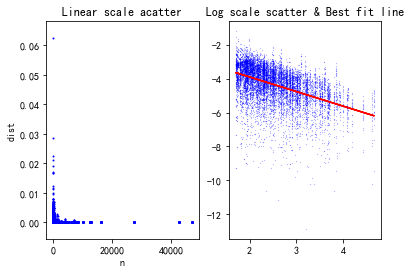

In [32]:
plt.figure()
axes1=plt.subplot(1,2,1)
m_d_50.plot(x='n',y='dist',kind='scatter',s=1,c='b',marker='o',ax=axes1)
axes1.set_title('Linear scale acatter')
axes2=plt.subplot(1,2,2)
x_log=np.log10(m_d_50['n'])
y_log=np.log10(m_d_50['dist'])
axes2.scatter(x_log,y_log,s=0.01,c='b',marker='o')
parameter=np.polyfit(x_log,y_log,1)
y=parameter[0]*x_log+parameter[1]
plt.plot(x_log,y,c='r')
axes2.set_title('Log scale scatter & Best fit line')
plt.show()